<a href="https://colab.research.google.com/github/steveLim0928/Foundation-in-ML/blob/main/Auto_Differentiation_Jax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import jax.numpy as jnp
from jax import grad, vmap, random

In [2]:
# %env JAX_PLATFORM_NAME=cpu
# If we uncomment the magic env line above, you won't 
# see the error of not finding a GPU/TPU  when you first call JAX (below)

In ordinary numpy we can define an array X and evaluate a numpy native function on X

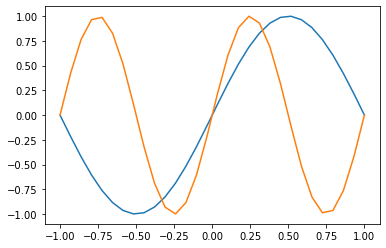

In [3]:
Xn=np.linspace(-1,1,30)
y1=np.sin(Xn*(np.pi))
y2=np.sin(Xn*(2*np.pi))
plt.plot(Xn,y1)
plt.plot(Xn,y2)

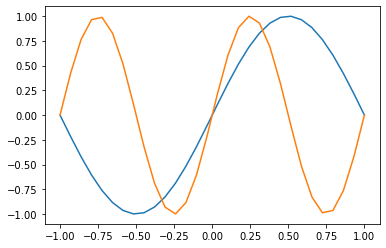

In [4]:
def wsin(w, xin):
    return jnp.array(jnp.sin(w*xin))
Xj=jnp.linspace(-1,1,30)

plt.plot(Xj, wsin(1., np.pi*Xj))
plt.plot(Xj, wsin(2., np.pi*Xj))

In [5]:
print(type(Xn), '\n', type(Xj)) # shows different types created by 2 diff func

<class 'numpy.ndarray'> 
 <class 'jaxlib.xla_extension.DeviceArray'>


JAX creates a different type, suitable for executing on different platforms.

**JAX numpy can give us derivatives of programs**

But now, we can do something in JAX numpy that wasn't possible in numpy. We can ask for the derivative of the function we have just defined. There are two arguments in  y=wsin(w,x) ,  w  and  x . We can define the partial derivatives  (∂/∂x)wsin(w,x)  and  (∂/∂w)wsin(w,x)